In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Load and Normalize the Dataset

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build the Neural Network (MLP)

In [6]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), 
    layers.Dense(256, activation='relu'),  
    layers.Dense(128, activation='relu'),   
    layers.Dense(10, activation='softmax')  ])

Compile the Model

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Train the Model

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/10
938/938 [==============================] - 3s 2ms/step - loss: 0.4935 - accuracy: 0.8251 - val_loss: 0.4525 - val_accuracy: 0.8278
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3577 - accuracy: 0.8688 - val_loss: 0.3788 - val_accuracy: 0.8641
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3225 - accuracy: 0.8813 - val_loss: 0.3628 - val_accuracy: 0.8696
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3002 - accuracy: 0.8888 - val_loss: 0.3535 - val_accuracy: 0.8708
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2813 - accuracy: 0.8953 - val_loss: 0.3289 - val_accuracy: 0.8816
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2679 - accuracy: 0.8996 - val_loss: 0.3281 - val_accuracy: 0.8813
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2545 - accuracy: 0.9051 - val_loss: 0.3333 - val_accuracy: 0.8810
Epoch 

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_acc * 100:.2f}%")


Final Test Accuracy: 88.53%


#### Visualizations

Plot Loss and Accuracy Curves

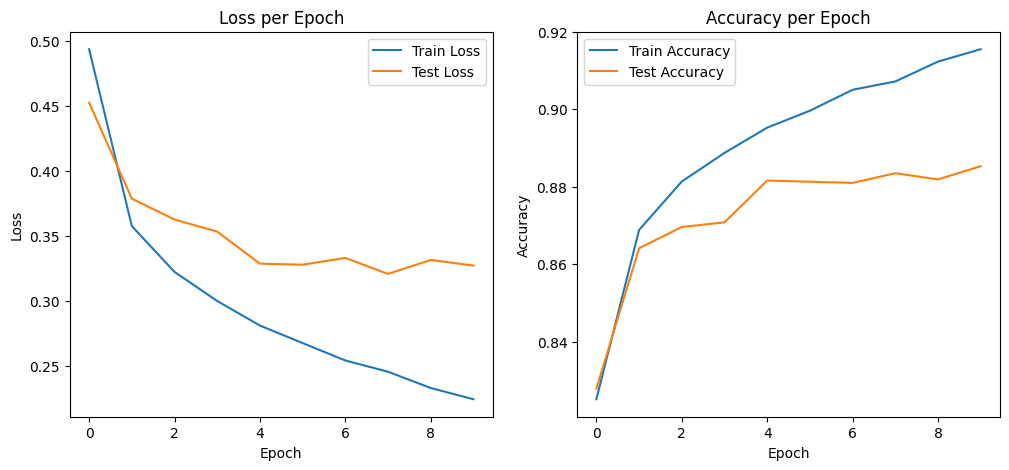

In [10]:
plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Confusion Matrix

313/313 [==============================] - 1s 1ms/step


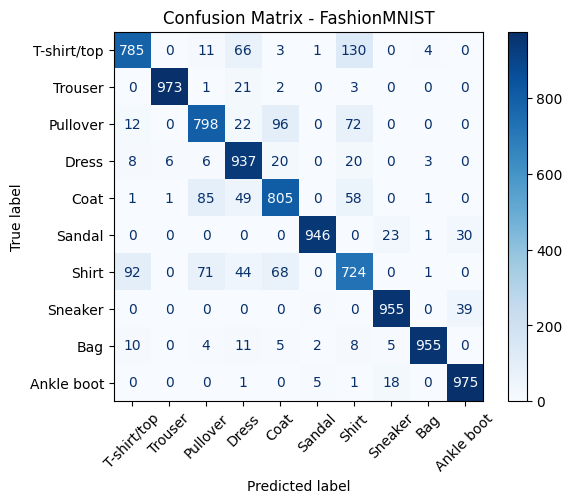

In [11]:
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix - FashionMNIST")
plt.show()

Example Predictions

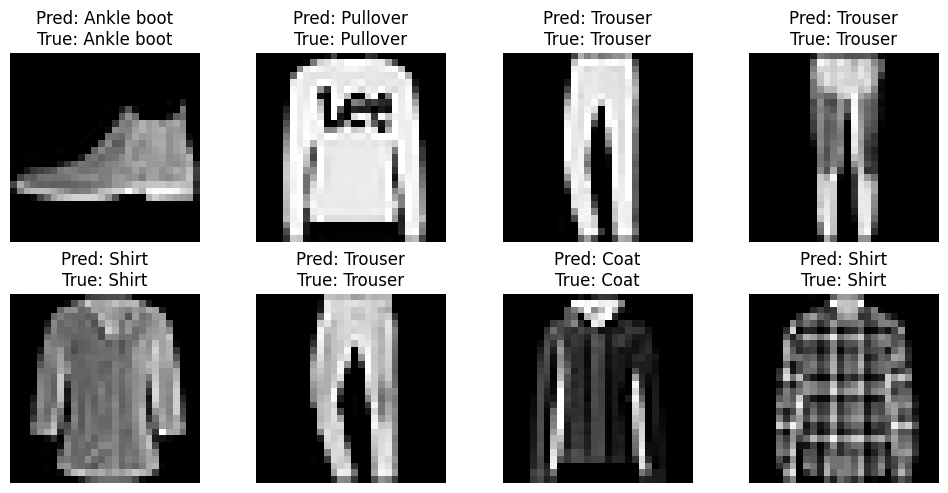

In [12]:
plt.figure(figsize=(10,5))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_test[i], cmap='gray')
    pred = classes[y_pred[i]]
    true = classes[y_test[i]]
    plt.title(f"Pred: {pred}\nTrue: {true}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Conclusion

In [14]:
print("Conclusion:")
print(f"The model achieved {test_acc*100:.2f}% accuracy on test data.")
print("The model successfully classifies Fashion-MNIST images with accuracy above 85%.")

Conclusion:
The model achieved 88.53% accuracy on test data.
The model successfully classifies Fashion-MNIST images with accuracy above 85%.
